In [11]:
import sklearn
import streamlit
import pandas as pd
# pandas is aliased as pd
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# pyplot s aliased as plt
import seaborn as sns
# seaborn is aliased as sns
import warnings
warnings.filterwarnings('ignore')
# Ignore all warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor , AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LinearRegression , LogisticRegression 
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from joblib import dump, load
import pickle

C:\Users\Aditya\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [207]:
pip show scikit_learn

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: c:\users\aditya\anaconda3\lib\site-packages
Requires: threadpoolctl, numpy, joblib, scipy
Required-by: imbalanced-learn
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [12]:
!pip install streamlit

In [13]:
pip show streamlit

Name: streamlit
Version: 1.29.0
Summary: A faster way to build and share data apps
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: c:\users\aditya\anaconda3\lib\site-packages
Requires: importlib-metadata, pyarrow, tzlocal, toml, packaging, tornado, python-dateutil, blinker, watchdog, rich, gitpython, pandas, tenacity, cachetools, pydeck, altair, validators, click, numpy, typing-extensions, protobuf, pillow, requests
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [110]:
# Load the dataset
df = pd.read_csv('CAR DETAILS.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [111]:
df.shape

(4340, 8)

In [112]:
df.duplicated().sum()

763

In [113]:
df.drop_duplicates(inplace=True)

In [114]:
df.shape

(3577, 8)

In [115]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [116]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [117]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [118]:
#df['year'].value_counts()  # 1992 to 2020

In [119]:
df['owner'].value_counts()

owner
First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: count, dtype: int64

In [120]:
df['transmission'].value_counts()

transmission
Manual       3265
Automatic     312
Name: count, dtype: int64

In [121]:
df['seller_type'].value_counts()     

seller_type
Individual          2832
Dealer               712
Trustmark Dealer      33
Name: count, dtype: int64

In [122]:
df['fuel'].value_counts()     

fuel
Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: count, dtype: int64

In [123]:
df['km_driven'].value_counts()     

km_driven
70000     210
80000     199
120000    199
60000     194
50000     181
         ... 
35925       1
40771       1
30500       1
55800       1
112198      1
Name: count, Length: 770, dtype: int64

In [124]:
df['selling_price'].value_counts()     

selling_price
300000     137
250000     112
350000     106
500000      87
600000      84
          ... 
2595000      1
368000       1
248000       1
641000       1
865000       1
Name: count, Length: 445, dtype: int64

In [125]:
df['name'].value_counts()     

name
Maruti Swift Dzire VDI               54
Maruti Alto 800 LXI                  48
Maruti Alto LXi                      42
Maruti Alto LX                       30
Maruti Swift VDI BSIV                28
                                     ..
Toyota Innova 2.5 E 8 STR             1
Nissan Micra XL CVT                   1
Mahindra Scorpio VLX AT 2WD BSIII     1
Toyota Corolla AE                     1
Hyundai i20 Magna 1.4 CRDi            1
Name: count, Length: 1491, dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


In [127]:
#df.describe(include='all')
df.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [128]:
# Extract the first name from the 'Name' column
df['Model_Name'] = df['name'].str.split().str.get(0)

# Display the DataFrame with the new 'First Name' column

In [129]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Model_Name
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [130]:
df1=df.copy()  # Original dataset

In [131]:
df1['Model_Name'].value_counts()

Model_Name
Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Jaguar              5
Mitsubishi          5
Land                5
Volvo               4
Jeep                3
Ambassador          3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: count, dtype: int64

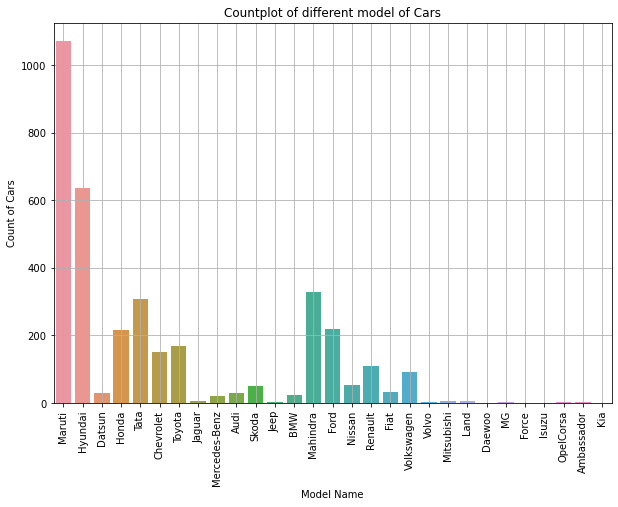

In [132]:
# Count plot the target variable
plt.figure(figsize=(10,7))
sns.countplot(x=df['Model_Name'])
plt.title('Countplot of different model of Cars')
plt.xticks(rotation=90)
plt.xlabel('Model Name')
plt.ylabel('Count of Cars')
plt.grid()
plt.show()

In [133]:
# Majority cars belongs to  Model Name - Maruti, Hyundai, Mahindra & Tata as per the dataset.

In [134]:
# Columns on which label encoding is to be done.
cols=['fuel','seller_type','transmission','owner','Model_Name']

In [135]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [136]:
for i in cols:
    df[i]=lb.fit_transform(df[i])

In [137]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Model_Name
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,18
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,18
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,10
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,5
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,9


In [158]:
# Saving the processed dataset
df.to_csv('Processed_Car_dataset.csv',index=False)

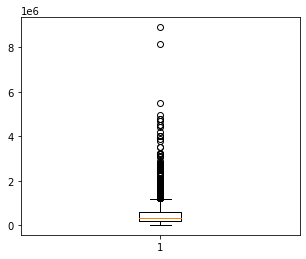

In [139]:
plt.figure(figsize =(5,4))
 
# Creating plot
plt.boxplot(df['selling_price'])
 
# show plot
plt.show()

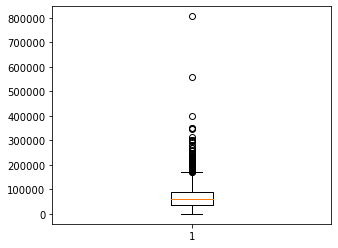

In [140]:
plt.figure(figsize =(5,4))  
 
# Creating plot
plt.boxplot(df['km_driven'])
 
# show plot
plt.show()

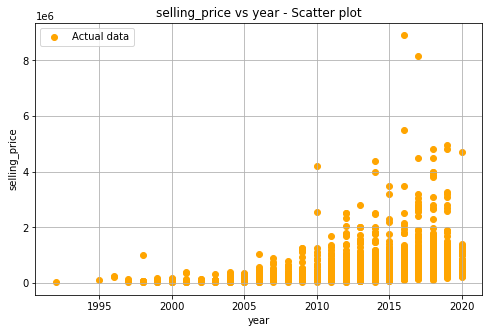

In [141]:
plt.figure(figsize =(8,5))
plt.scatter(df['year'],df['selling_price'],color='orange', label='Actual data')
plt.title('selling_price vs year - Scatter plot')
plt.xlabel('year')
plt.ylabel('selling_price')
plt.legend()
plt.grid()
plt.show()

In [142]:
# Min-max scaling is generally sensitive to outliers, 
# Here it is clearly visible that data contains outliers 
# Hence, standard scaling is a more robust choice.

In [143]:
# Columns to be dropped from features (X)
col_drop=['name','selling_price']

In [144]:
# Split the dataset into features (X) and the target variable (y)

X = df.drop(col_drop,axis=1)
y = df['selling_price']
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(3577, 7)
(3577,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [145]:
X.head()

,year,km_driven,fuel,seller_type,transmission,owner,Model_Name
0,2007,70000,4,1,1,0,18
1,2007,50000,4,1,1,0,18
2,2012,100000,1,1,1,0,10
3,2017,46000,4,1,1,0,5
4,2014,141000,1,1,1,2,9


In [146]:
# Standardize the features using Standard Scaling from sklearn preprocessing library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-1.40256584  0.01575368  1.03272341 ...  0.30912612 -0.70888558
   0.3434235 ]
 [-1.40256584 -0.4046503   1.03272341 ...  0.30912612 -0.70888558
   0.3434235 ]
 [-0.22641758  0.64635965 -0.95617733 ...  0.30912612 -0.70888558
  -0.84878892]
 ...
 [-0.93210654  0.28901627  1.03272341 ...  0.30912612  0.85731808
   0.3434235 ]
 [ 0.71450103  0.43615766 -0.95617733 ...  0.30912612 -0.70888558
  -0.84878892]
 [ 0.71450103 -0.61485229  1.03272341 ...  0.30912612 -0.70888558
   1.08855627]]


In [147]:
#print(X_scaled)
!pip install -U scikit-learn

  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Aditya\\anaconda3\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [148]:
# Importing train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [149]:
# Splitting the Dataset in to training dataset(75%) and test dataset(25%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [150]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [151]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Creating a function to generate Regression Metrics

def reg_eval_metrics(y_train, ypred): 
    mae = mean_absolute_error(y_train, ypred)
    mse = mean_squared_error(y_train, ypred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, ypred)
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Score:", r2)

def train_test_scr(model):
    print('Training Score',model.score(X_train,y_train))  # R2 score for Training data
    print('Testing Score',model.score(X_test,y_test))     # R2 score for test data


In [152]:
# Initialize and train the Regressors algorithms 
regressors = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'KNN Regression': KNeighborsRegressor(n_neighbors=11),
    'Decision Tree Regression': DecisionTreeRegressor(max_depth=5),
    'RandomForest Regression': RandomForestRegressor(n_estimators=100, random_state=42),
    'Bagging_DT Regression': BaggingRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=20, random_state=42),
    'Bagging_LR Regression': BaggingRegressor(LinearRegression(), n_estimators=20, random_state=42),
    'AdaBoost_DT Regression': AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=50, random_state=42)
}

In [153]:
# Fitting various classification algorithm on the training data 
# Evaluating the model using Model evaluation techniques like(MSE,RMSE,MAE,R2 Score, Model Score )
model=[]
results = {}
for reg_name, reg in regressors.items():
    m=reg.fit(X_train, y_train)
    print("Training :",reg_name)
    ypred = reg.predict(X_test)
    print("Predicting using :",reg_name)
    reg_eval_metrics(y_test,ypred) 
    train_test_scr(m)
   # model_coeff(m)
    results[reg_name] = m.score(X_test, y_test)
    model.append(m)
    print("")

Training : Linear Regression
Predicting using : Linear Regression
MAE: 211816.66012335496
MSE: 186093695792.76746
RMSE: 431385.7853392569
R2 Score: 0.410259458507105
Training Score 0.43601759171258403
Testing Score 0.410259458507105

Training : Lasso Regression
Predicting using : Lasso Regression
MAE: 211816.3768599178
MSE: 186093830122.1211
RMSE: 431385.9410343841
R2 Score: 0.41025903281043963
Training Score 0.4360175916914871
Testing Score 0.41025903281043963

Training : Ridge Regression
Predicting using : Ridge Regression
MAE: 211798.08243057455
MSE: 186098334846.31387
RMSE: 431391.1622255536
R2 Score: 0.41024475710661523
Training Score 0.43601754750301447
Testing Score 0.41024475710661523

Training : KNN Regression
Predicting using : KNN Regression
MAE: 179167.93285931944
MSE: 182051822623.753
RMSE: 426675.31288293796
R2 Score: 0.4230683635115744
Training Score 0.6106575352503731
Testing Score 0.4230683635115744

Training : Decision Tree Regression
Predicting using : Decision Tree 

In [154]:
print(results)

{'Linear Regression': 0.410259458507105, 'Lasso Regression': 0.41025903281043963, 'Ridge Regression': 0.41024475710661523, 'KNN Regression': 0.4230683635115744, 'Decision Tree Regression': 0.28302246305445167, 'RandomForest Regression': 0.4920195042699116, 'Bagging_DT Regression': 0.5003411162371231, 'Bagging_LR Regression': 0.41028049062406624, 'AdaBoost_DT Regression': 0.49598376983041537}


In [155]:
print(model)

[LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(n_neighbors=11), DecisionTreeRegressor(max_depth=5), RandomForestRegressor(random_state=42), BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=5), n_estimators=20,
                 random_state=42), BaggingRegressor(estimator=LinearRegression(), n_estimators=20, random_state=42), AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5), random_state=42)]


In [156]:
# Consolidated Report of Classifiers with their Accuracy
res = pd.DataFrame(results,index=['R2_Score'])
res.T # T indicates Transpose

,R2_Score
Linear Regression,0.410259
Lasso Regression,0.410259
Ridge Regression,0.410245
KNN Regression,0.423068
Decision Tree Regression,0.283022
RandomForest Regression,0.492020
Bagging_DT Regression,0.500341
Bagging_LR Regression,0.410280
AdaBoost_DT Regression,0.495984


In [157]:
# Find the best model
best_model = max(results, key=results.get)

print(f"The best model is: {best_model} with R2 score: {results[best_model]}")

The best model is: Bagging_DT Regression with R2 score: 0.5003411162371231


In [62]:
# To get the best model : RandomForestRegressor
Best_Model=model[5]
print(Best_Model)

RandomForestRegressor(random_state=42)


In [64]:
ypred=Best_Model.predict(X_scaled)
print(ypred)

[ 69692.06349206 129174.99       576715.         ... 121556.65666667
 852007.60733333 272664.93      ]


In [191]:
def optimal_k():
    k=list(range(3,20,2))
    acc=[]
    for i in range(len(k)):
        m1 = KNeighborsRegressor(n_neighbors=k[i])
        m1.fit(X_train, y_train)
        acc.append(m1.score(X_test, y_test))
    print('Accuracy \n',acc)
    plt.plot(k,acc,color='maroon',marker='o')
    plt.xlabel('Num of Nearest Neighbors')
    plt.ylabel('Test accuarcy')
    plt.grid()
    plt.show()

Accuracy 
 [0.5210619370664403, 0.521316366326025, 0.5306173280093835, 0.5350459168421251, 0.5415120593699144, 0.5316194916367389, 0.521888863328539, 0.5155987117601624, 0.5132840039437183]


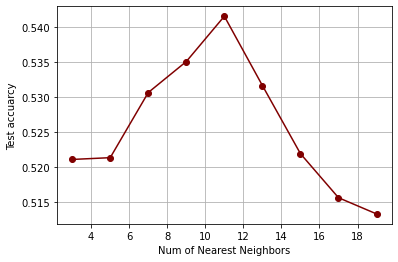

In [192]:
optimal_k()

In [193]:
# To save the best model and load the model using pickle library

In [2]:
import pickle

In [76]:
pickle.dump(Best_Model, open('best_model.pkl', 'wb'))   # wb = write binary

In [77]:
loaded_model = pickle.load(open('Best_Model.pkl', 'rb'))  # rb = read binary

In [78]:
# Taking original dataset and randomly generating 20 data points and applying on the best model

In [80]:
import random

# Function to generate a random dataset with a specific number of data points
def generate_random_dataset(df1, num_points=20):
    if num_points > len(df1):
        raise ValueError("Number of points requested is greater than the size of the original dataset.")
    
    random_indices = random.sample(range(len(df1)), num_points)
    random_data = df1.iloc[random_indices]
    return random_data

# Generate a random dataset with 20 data points
random_data = generate_random_dataset(df1, num_points=20)

# Display the original and random datasets
print("Original Dataset:")
print(df1)
print("\nRandom Dataset (20 data points):")
print(random_data)

Original Dataset:
                                     name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission         owner Model

In [81]:
# Saving the randomly generated dataset
random_data.to_csv('Random_Car_dataset.csv',index=False)

In [82]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [83]:
for i in cols:
    random_data[i]=lb.fit_transform(random_data[i])

In [84]:
# Columns to be dropped from features (X)
col_drop=['name','selling_price']

In [85]:
# Split the dataset into features (X) and the target variable (y)

X20 = random_data.drop(col_drop,axis=1)
y20 = random_data['selling_price']
print(X20.shape)
print(y20.shape)
print(type(X20))
print(type(y20))

(20, 7)
(20,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [86]:
# Standardize the features using Standard Scaling from sklearn preprocessing library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled20 = scaler.fit_transform(X20)

In [87]:
# Applying the random dataset on the RandomForestRegressor model and checking model score.
test_model_score = loaded_model.score(X_scaled20,y20)
print(test_model_score)

0.9074250993589155


28

In [88]:
input={'year':2007,
       'km_driven':70000,
       'fuel':4,
       'seller_type':1,
       'transmission':1,
       'owner':0,
       'Model_Name':18}
scaled_data={}
for i_name, i in input.items():
    mean_value = X[i_name].mean()
    std_value = X[i_name].std()
    S_data = (i - mean_value) / std_value
    scaled_data[i_name]=S_data

print(scaled_data)
X1_scaled=pd.DataFrame(scaled_data, index=['value'])
X1_scaled.T

{'year': -1.4449078170681682, 'km_driven': 0.08112971206813582, 'fuel': 1.0148764413914573, 'seller_type': 0.44813999935569204, 'transmission': 0.33923648257272854, 'owner': -0.6650026814617235, 'Model_Name': 0.3581312643184909}


,value
year,-1.444908
km_driven,0.081130
fuel,1.014876
seller_type,0.448140
transmission,0.339236
owner,-0.665003
Model_Name,0.358131


In [89]:
#SP_model_name=df.groupby('Model_Name')['selling_price'].mean()
#SP_model_name.sort_values(ascending=False)

In [90]:
df2=df.copy()

In [95]:
#df.drop('First Name',axis=1,inplace=True)